In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'D:/A-DataScience/DataSets/Echocardiogram/uci-echocardiogram/echocardiogram.csv')

In [3]:
df.head()

,11,0,71,0.1,0.26,9,4.6,14,1,1.1,name,1.2,0.2,Unnamed: 13
0,19,0,72,0,0.38,6,4.1,14,1.7,0.588,name,1,0,NaN
1,16,0,55,0,0.26,4,3.42,14,1,1,name,1,0,NaN
2,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0,NaN
3,19,1,57,0,0.16,22,5.75,18,2.25,0.571,name,1,0,NaN
4,26,0,68,0,0.26,5,4.31,12,1,0.857,name,1,0,NaN


Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   11           130 non-null    object
 1   0            131 non-null    object
 2   71           131 non-null    object
 3   0.1          131 non-null    int64 
 4   0.26         131 non-null    object
 5   9            131 non-null    object
 6   4.6          131 non-null    object
 7   14           131 non-null    object
 8   1            131 non-null    object
 9   1.1          131 non-null    object
 10  name         131 non-null    object
 11  1.2          131 non-null    object
 12  0.2          131 non-null    object
 13  Unnamed: 13  1 non-null      object
dtypes: int64(1), object(13)
memory usage: 14.5+ KB


In [5]:
#i will reasign columns name to make it clear while working
#notice that we have 14 columns not 13 so i will resign the last one as 'not found'
df.columns=['survival','still-alive','attack_age','pericardial_effusion','fractional-shortening','epss','lvdd','wall_motion_score','wall_motion_index',
'mult','name','group','alive_at_1','not found']

In [6]:
df.head()

,survival,still-alive,attack_age,pericardial_effusion,fractional-shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1,not found
0,19,0,72,0,0.38,6,4.1,14,1.7,0.588,name,1,0,NaN
1,16,0,55,0,0.26,4,3.42,14,1,1,name,1,0,NaN
2,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0,NaN
3,19,1,57,0,0.16,22,5.75,18,2.25,0.571,name,1,0,NaN
4,26,0,68,0,0.26,5,4.31,12,1,0.857,name,1,0,NaN


In [7]:
#Now i will remove usless columns
df.drop(columns=['wall_motion_score','mult','name','group','not found'],inplace=True)

In [8]:
df.head()

,survival,still-alive,attack_age,pericardial_effusion,fractional-shortening,epss,lvdd,wall_motion_index,alive_at_1
0,19,0,72,0,0.38,6,4.1,1.7,0
1,16,0,55,0,0.26,4,3.42,1,0
2,57,0,60,0,0.253,12.062,4.603,1.45,0
3,19,1,57,0,0.16,22,5.75,2.25,0
4,26,0,68,0,0.26,5,4.31,1,0


In [9]:
#let us take a look to the tail
df.tail()

,survival,still-alive,attack_age,pericardial_effusion,fractional-shortening,epss,lvdd,wall_motion_index,alive_at_1
126,7.5,1,64,0,0.24,12.9,4.72,1,?
127,41,0,64,0,0.28,5.4,5.47,1.1,?
128,36,0,69,0,0.2,7,5.05,1.21,?
129,22,0,57,0,0.14,16.1,4.36,1.36,?
130,20,0,62,0,0.15,0,4.51,1.409,?


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               130 non-null    object
 1   still-alive            131 non-null    object
 2   attack_age             131 non-null    object
 3   pericardial_effusion   131 non-null    int64 
 4   fractional-shortening  131 non-null    object
 5   epss                   131 non-null    object
 6   lvdd                   131 non-null    object
 7   wall_motion_index      131 non-null    object
 8   alive_at_1             131 non-null    object
dtypes: int64(1), object(8)
memory usage: 9.3+ KB


In [11]:
#we notice that we have '?' which we consider as a missing value, so let us turns it into NAN
df.replace('?', np.nan,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   survival               129 non-null    object
 1   still-alive            130 non-null    object
 2   attack_age             125 non-null    object
 3   pericardial_effusion   131 non-null    int64 
 4   fractional-shortening  123 non-null    object
 5   epss                   116 non-null    object
 6   lvdd                   120 non-null    object
 7   wall_motion_index      129 non-null    object
 8   alive_at_1             74 non-null     object
dtypes: int64(1), object(8)
memory usage: 9.3+ KB


In [13]:
#i will drop all rows that contains more than 25% missing Values
df.dropna(thresh=6,inplace=True)

In [14]:
#Now i will drop the rows which survival value is 'NaN' in it, as it will be useless
df.dropna(subset=['survival'],inplace=True)

In [15]:
# i will reset the index to make everything ok
df.reset_index(level=0, inplace=True)

In [16]:
#Now i am going to fix the missed Values in the 'alive_at_1' as it depends on the 'survival' column

In [17]:
#at first i will convert the type of survival 
df['survival']=pd.to_numeric(df['survival'])

In [18]:
#Now i will fix the missed Values in the 'alive_at_1' as it depends on the 'survival' column
x=df['survival']
z=0
for y in range(len(x)):
    i=df.at[y,'survival']
    if i>=12:
        df.at[z,'alive_at_1']='1'
        z+=1
    else:
        df.at[z,'alive_at_1']='0'
        z+=1

In [19]:
#Fixing Done
df['alive_at_1'].value_counts()

1    92
0    35
Name: alive_at_1, dtype: int64

In [20]:
df.isnull().sum()

index                     0
survival                  0
still-alive               0
attack_age                4
pericardial_effusion      0
fractional-shortening     5
epss                     13
lvdd                      8
wall_motion_index         1
alive_at_1                0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  127 non-null    int64  
 1   survival               127 non-null    float64
 2   still-alive            127 non-null    object 
 3   attack_age             123 non-null    object 
 4   pericardial_effusion   127 non-null    int64  
 5   fractional-shortening  122 non-null    object 
 6   epss                   114 non-null    object 
 7   lvdd                   119 non-null    object 
 8   wall_motion_index      126 non-null    object 
 9   alive_at_1             127 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 10.0+ KB


In [22]:
#we notice that ['attack_age','fractional-shortening','epss','lvdd','wall_motion_index'] should be float.
#let's do it
df[['attack_age','fractional-shortening','epss','lvdd','wall_motion_index']]
df[['attack_age','fractional-shortening','epss','lvdd','wall_motion_index']]= df[['attack_age','fractional-shortening','epss','lvdd','wall_motion_index']].apply(pd.to_numeric)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  127 non-null    int64  
 1   survival               127 non-null    float64
 2   still-alive            127 non-null    object 
 3   attack_age             123 non-null    float64
 4   pericardial_effusion   127 non-null    int64  
 5   fractional-shortening  122 non-null    float64
 6   epss                   114 non-null    float64
 7   lvdd                   119 non-null    float64
 8   wall_motion_index      126 non-null    float64
 9   alive_at_1             127 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 10.0+ KB


In [24]:
# Now we will fill NaN values in other Columns
z=df[['attack_age','fractional-shortening','epss','lvdd','wall_motion_index']]
for column in z:
    mean=int(df[column].mean(skipna=True))
    df.column=df[column].replace(np.nan,mean,inplace=True)

In [25]:
df.isnull().sum()

index                    0
survival                 0
still-alive              0
attack_age               0
pericardial_effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall_motion_index        0
alive_at_1               0
dtype: int64

In [26]:
df.info()
#Now Everything is ready for the next Stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  127 non-null    int64  
 1   survival               127 non-null    float64
 2   still-alive            127 non-null    object 
 3   attack_age             127 non-null    float64
 4   pericardial_effusion   127 non-null    int64  
 5   fractional-shortening  127 non-null    float64
 6   epss                   127 non-null    float64
 7   lvdd                   127 non-null    float64
 8   wall_motion_index      127 non-null    float64
 9   alive_at_1             127 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 10.0+ KB


Explore the Data (EDA)
Now we Explore the data to get  insights from it

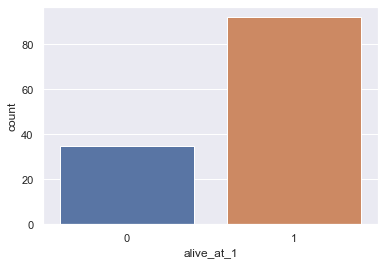

In [27]:
#lets count the number of people who live at least one year
sns.countplot(df['alive_at_1'])

In [29]:
df['alive_at_1'].value_counts()
#we see that the number of people who live at least one year is higher than those who died

1    92
0    35
Name: alive_at_1, dtype: int64

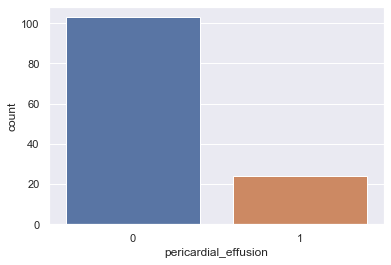

In [109]:
sns.countplot(df['pericardial_effusion'])

In [110]:
df['pericardial_effusion'].value_counts()

0    103
1     24
Name: pericardial_effusion, dtype: int64

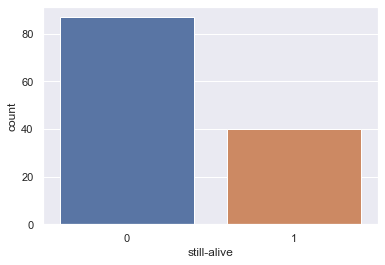

In [112]:
sns.countplot(df['still-alive'])

In [113]:
df['still-alive'].value_counts()

0    87
1    40
Name: still-alive, dtype: int64

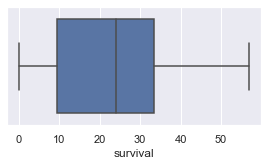

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.boxplot(df['survival'])    

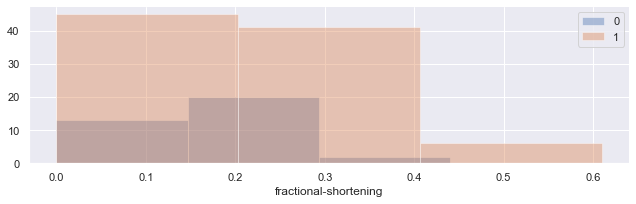

In [125]:
g = sns.FacetGrid(df,hue='alive_at_1',aspect=3)
g.map(plt.hist,'fractional-shortening',alpha=0.4,bins=3)
plt.legend()

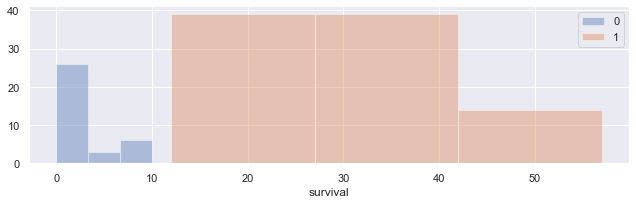

In [124]:
g = sns.FacetGrid(df,hue='alive_at_1',aspect=3)
g.map(plt.hist,'survival',alpha=0.4,bins=3)
plt.legend()

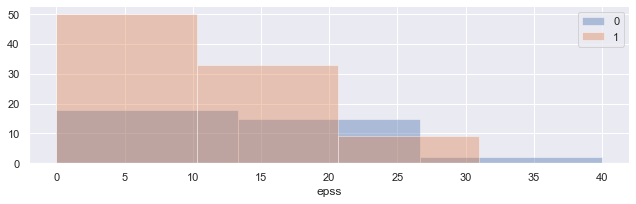

In [123]:
g = sns.FacetGrid(df,hue='alive_at_1',aspect=3)
g.map(plt.hist,'epss',alpha=0.4,bins=3)
plt.legend()

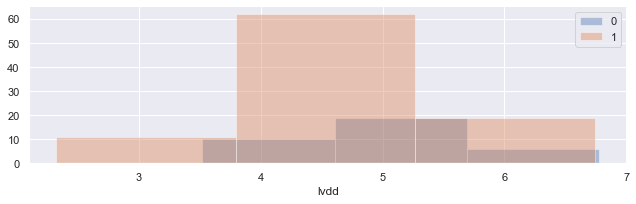

In [127]:
g = sns.FacetGrid(df,hue='alive_at_1',aspect=3)
g.map(plt.hist,'lvdd',alpha=0.4,bins=3)
plt.legend()

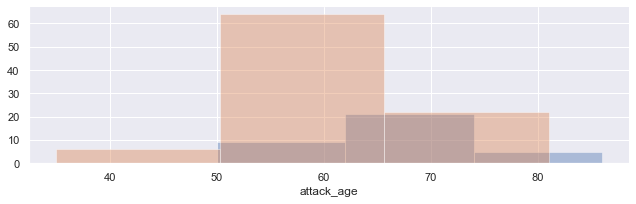

In [132]:
g = sns.FacetGrid(df,hue='alive_at_1',aspect=3)
g.map(plt.hist,'attack_age',alpha=0.4,bins=3)


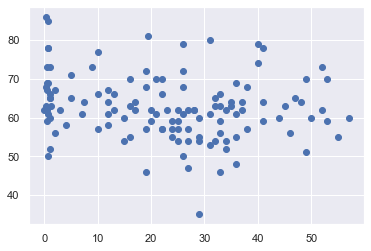

In [43]:
#we notice that the survival is between 0 and nearly 33 and average between 25 months
plt.scatter(x=df['survival'],y=df['attack_age'])

In [46]:
df.loc[:,['survival','attack_age']].corr()

,survival,attack_age
survival,1.000000,-0.186947
attack_age,-0.186947,1.000000


In [ ]:
#there is no correlation between them

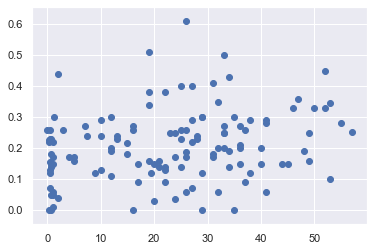

In [45]:
plt.scatter(x=df['survival'],y=df['fractional-shortening'])

In [47]:
df.loc[:,['survival','fractional-shortening']].corr()

,survival,fractional-shortening
survival,1.000000,0.253138
fractional-shortening,0.253138,1.000000


In [52]:
#There is a 25% correlation between them which make no sense as they are dependant

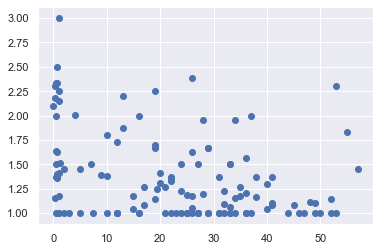

In [54]:
plt.scatter(x=df['survival'],y=df['wall_motion_index'])

In [55]:
df.loc[:,['survival','wall_motion_index']].corr()

,survival,wall_motion_index
survival,1.000000,-0.347585
wall_motion_index,-0.347585,1.000000


In [56]:
#there is no correlation between them

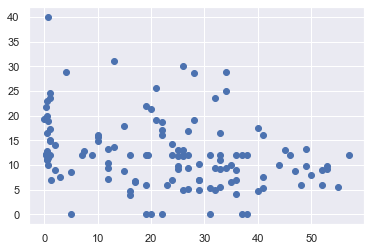

In [57]:
plt.scatter(x=df['survival'],y=df['epss'])

In [58]:
df.loc[:,['survival','epss']].corr()

,survival,epss
survival,1.00000,-0.28531
epss,-0.28531,1.00000


In [59]:
#there is no correlation between them

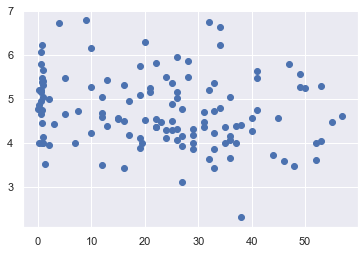

In [60]:
plt.scatter(x=df['survival'],y=df['lvdd'])

In [61]:
df.loc[:,['survival','lvdd']].corr()

,survival,lvdd
survival,1.000000,-0.194271
lvdd,-0.194271,1.000000


In [62]:
#there is no correlation between them

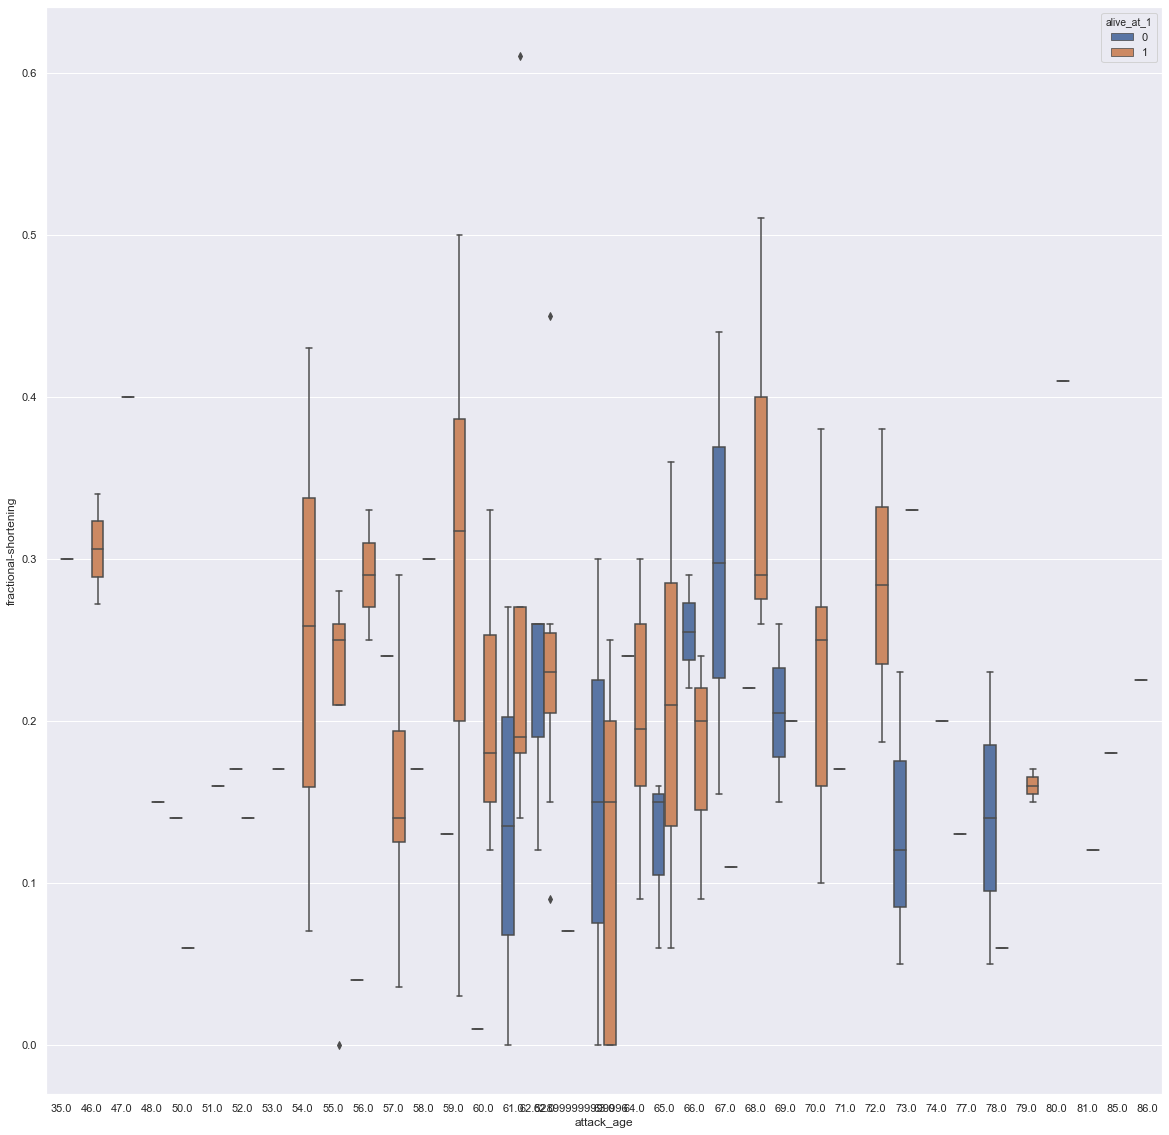

In [67]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['attack_age'],y=df['fractional-shortening'],hue=df['alive_at_1'])

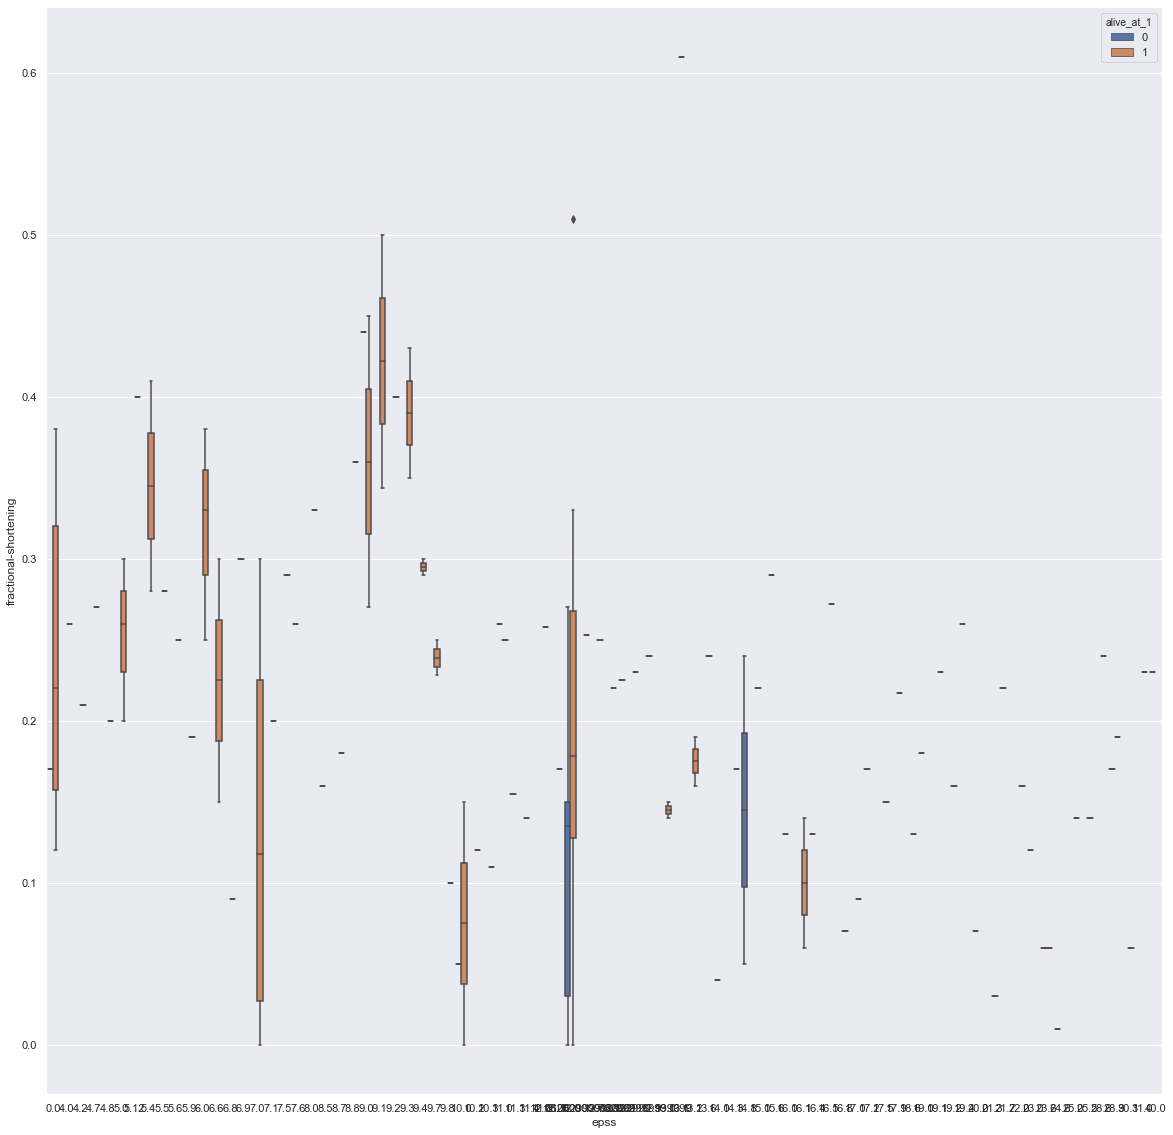

In [68]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['epss'],y=df['fractional-shortening'],hue=df['alive_at_1'])

KNN Algorithm

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  127 non-null    int64  
 1   survival               127 non-null    float64
 2   still-alive            127 non-null    object 
 3   attack_age             127 non-null    float64
 4   pericardial_effusion   127 non-null    int64  
 5   fractional-shortening  127 non-null    float64
 6   epss                   127 non-null    float64
 7   lvdd                   127 non-null    float64
 8   wall_motion_index      127 non-null    float64
 9   alive_at_1             127 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 10.0+ KB


In [70]:
#i am going to split dataset to model data(x) and our target(y)
x=df.iloc[: ,0:9]
y=df.iloc[: ,9]
#then i am going to split between training and testing be 20:80
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1,test_size=0.2)

In [83]:
#Feature scaling
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

Now let's Define our model with different values of k to get the best accuracy score

K=6

In [133]:
#Now let's define the model with K=6
knn=KNeighborsClassifier(n_neighbors=6,p=2,metric='euclidean')

In [134]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [135]:
y_predict=knn.predict(x_test)
y_predict

array(['1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1'],
      dtype=object)

In [136]:
#Evaluate the model
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 2,  3],
       [ 2, 19]], dtype=int64)

In [137]:
accuracy_score(y_test,y_predict)

0.8076923076923077

K=4

In [138]:
#Now let's define the model with K=4
knn=KNeighborsClassifier(n_neighbors=4,p=2,metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [139]:
y_predict=knn.predict(x_test)
y_predict

array(['1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
      dtype=object)

In [140]:
#Evaluate the model
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 3,  2],
       [ 0, 21]], dtype=int64)

In [141]:
accuracy_score(y_test,y_predict)

0.9230769230769231

K=8

In [142]:
#Now let's define the model with K=8
knn=KNeighborsClassifier(n_neighbors=8,p=2,metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [143]:
y_predict=knn.predict(x_test)
y_predict

array(['1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1'],
      dtype=object)

In [144]:
#Evaluate the model
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 3,  2],
       [ 2, 19]], dtype=int64)

In [145]:
accuracy_score(y_test,y_predict)

0.8461538461538461

At the End I used 3 different values for k[4,6,8] and the best accuracy_score was with k=4 as 0.9230769230769231